## Figuras que compõem o artigo

Andressa Wille - março de 2024

#### Neste notebook estão as figuras que compõem o artigo "Effects of warps in barred galaxies".

Bibliotecas utilizadas e parâmetros das figuras:

In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import math
import unsiotools.unsiotools.simulations.cfalcon as falcon
from scipy import stats
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable, host_subplot
from scipy.signal import savgol_filter
from bar_funcs import *

Unable to import [unsiotools.py_unstools]....


In [2]:
plt.rc('text', usetex=True)
plt.rcParams['font.size'       ] = 8
plt.rcParams['legend.fontsize' ] = 8
plt.rcParams['legend.frameon'  ] = False
plt.rcParams['font.family'     ] = 'Times'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['xtick.direction' ] = 'in'
plt.rcParams['ytick.direction' ] = 'in'
plt.rcParams['xtick.top'       ] = True
plt.rcParams['ytick.right'     ] = True
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.minor.size'] = 1
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.minor.size'] = 1
plt.rcParams['xtick.major.width'] = 0.75
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.75
plt.rcParams['ytick.minor.width'] = 0.5

Caminhos para os arquivos:

In [3]:
#barrada e não barrada isoladas
path_b = 'barrada/'
path_nb = 'new-nb-100/'

paths1 = [path_b]
paths1_ = [path_nb]
paths2 = [path_b, path_nb]

In [4]:
#barrada + satélites
path_01_10 = 'satelites/sat01-10/'
path_01_20 = 'satelites/sat01-20/'
path_01_30 = 'satelites/sat01-30/'
path_05_10 = 'satelites/sat05-10/'
path_05_20 = 'satelites/sat05-20/'
path_05_30 = 'satelites/sat05-30/'
path_1_10 = 'satelites/sat1-10/'
path_1_20 = 'satelites/sat1-20/'
path_1_30 = 'satelites/sat1-30/'

paths = [path_01_10, path_01_20, path_01_30, path_05_10, path_05_20, 
         path_05_30, path_1_10, path_1_20, path_1_30]

In [5]:
#não barrada + satélites
path_01_10_ = 'new-nb-01-10/'
path_01_20_ = 'new-nb-01-20/'
path_01_30_ = 'new-nb-01-30/'
path_05_10_ = 'new-nb-05-10/'
path_05_20_ = 'new-nb-05-20/'
path_05_30_ = 'new-nb-05-30/'
path_1_10_ = 'new-nb-1-10/'
path_1_20_ = 'new-nb-1-20/'
path_1_30_ = 'new-nb-1-30/'

paths_ = [path_01_10_, path_01_20_, path_01_30_, path_05_10_, path_05_20_,
          path_05_30_, path_1_10_, path_1_20_, path_1_30_]

In [6]:
#teste sem gás
path_05_20_teste = 'new-teste/'

#### Fig. 1 - Circular velocity curve of the barred galaxy.

In [7]:
n_snapshots_ = 281

v_c_disk_ = r_disk_ = np.empty(n_snapshots_)
v_c_halo_ = r_halo_ = np.empty(n_snapshots_)
v_c_gas_ = r_gas_ = np.empty(n_snapshots_)
v_c_star_ = r_star_ = np.empty(n_snapshots_)
v_c_bulge_ = r_bulge_ = np.empty(n_snapshots_)

v_c_disk = r_disk = np.empty(n_snapshots_)
v_c_halo = r_halo = np.empty(n_snapshots_)
v_c_bulge = r_bulge = np.empty(n_snapshots_)

In [8]:
#velocidade circular
for p, path in enumerate(paths2):
    snapshot = path + f'snapshot_000.hdf5'

    #ler snapshot
    f = h5py.File(snapshot, 'r')
    
    time = round(f['Header'].attrs['Time'], 2)
    print(time)
    
    #ler info disco
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    m_disk = np.array(f_disk['Masses'])
    
    #ler info halo
    f_halo = f['PartType1']

    x_halo = np.array(f_halo['Coordinates'][:,0])
    y_halo = np.array(f_halo['Coordinates'][:,1])
    z_halo = np.array(f_halo['Coordinates'][:,2])
    m_halo = np.array(f_halo['Masses'])
    
    #ler info bojo
    f_bulge = f['PartType3']

    x_bulge = np.array(f_bulge['Coordinates'][:,0])
    y_bulge = np.array(f_bulge['Coordinates'][:,1])
    z_bulge = np.array(f_bulge['Coordinates'][:,2])
    m_bulge = np.array(f_bulge['Masses'])
    
    #corrigir posição
    x_new_bulge, y_new_bulge, z_new_bulge = shift_com(m_bulge, x_bulge, y_bulge, z_bulge)
    x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
    x_new_halo, y_new_halo, z_new_halo = shift_com(m_halo, x_halo, y_halo, z_halo)

    #se a galáxia também tem gás e estrelas:
    if p == 1:

        #ler info gas
        f_gas = f['PartType0']

        x_gas = np.array(f_gas['Coordinates'][:,0])
        y_gas = np.array(f_gas['Coordinates'][:,1])
        z_gas = np.array(f_gas['Coordinates'][:,2])
        m_gas = np.array(f_gas['Masses'])
        
        x_new_gas, y_new_gas, z_new_gas = shift_com(m_gas, x_gas, y_gas, z_gas)

    #calcular velocidade circular
    G = 43007.1
    if p == 0:
        v_c_disk, r_disk, M_r_disk = v_circ_comp(m=m_disk, x=x_new_disk, y=y_new_disk, 
                                                          z=z_new_disk, Rmax=30.0, Nbins=90)
        v_c_halo, r_halo, M_r_halo = v_circ_comp(m=m_halo, x=x_new_halo, y=y_new_halo, 
                                                     z=z_new_halo, Rmax=30.0, Nbins=90)
        v_c_bulge, r_bulge, M_r_bulge = v_circ_comp(m=m_bulge, x=x_new_bulge, y=y_new_bulge, 
                                                     z=z_new_bulge, Rmax=30.0, Nbins=90)
        
        M_r_tot = (M_r_disk + M_r_halo + M_r_bulge)
        v_c = (np.sqrt(G*M_r_tot/r_disk))
        
    if p == 1:
        v_c_disk_, r_disk_, M_r_disk_ = v_circ_comp(m=m_disk, x=x_new_disk, y=y_new_disk, 
                                                          z=z_new_disk, Rmax=30.0, Nbins=90)
        v_c_halo_, r_halo_, M_r_halo_ = v_circ_comp(m=m_halo, x=x_new_halo, y=y_new_halo, 
                                                     z=z_new_halo, Rmax=30.0, Nbins=90)
        v_c_bulge_, r_bulge_, M_r_bulge_ = v_circ_comp(m=m_bulge, x=x_new_bulge, y=y_new_bulge, 
                                                     z=z_new_bulge, Rmax=30.0, Nbins=90)
        v_c_gas_, r_gas_, M_r_gas_ = v_circ_comp(m=m_gas, x=x_new_gas, y=y_new_gas, 
                                                     z=z_new_gas, Rmax=30.0, Nbins=90)
        
        M_disk_sum_ = (M_r_disk_ + M_r_gas_)
        v_c_disk_sum_ = (np.sqrt(G*M_disk_sum_/r_disk_))
        M_r_tot_ = (M_r_disk_ + M_r_halo_ + M_r_bulge_ + M_r_gas_)
        v_c_ = (np.sqrt(G*M_r_tot_/r_disk_))

0.0
0.0


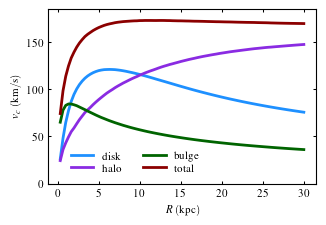

In [9]:
plt.rcParams['figure.figsize'  ] = (3.3,2.3)

plt.plot(r_disk, v_c_disk, color='dodgerblue', lw=2, label='disk')
plt.plot(r_disk, v_c_halo, color='blueviolet', lw=2, label='halo')
plt.plot(r_disk, v_c_bulge, color='darkgreen', lw=2, label='bulge')
plt.plot(r_disk, v_c, color='darkred', lw=2, label='total')
plt.xlabel('$R \; \mathrm{(kpc)}$')
plt.ylabel('$v_c \; \mathrm{(km/s)}$')
plt.legend(frameon=False, loc="lower right", ncol=2,
           labelspacing = 0.2, bbox_to_anchor=(0.6,0.0))
plt.ylim(0, 185)

plt.tight_layout()
plt.savefig('figuras_2/fig1-vc-b.pdf')

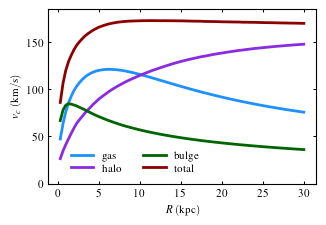

In [10]:
plt.rcParams['figure.figsize'  ] = (3.3,2.3)

plt.plot(r_disk_, v_c_disk_sum_, color='dodgerblue', lw=2, label='gas')
plt.plot(r_disk_, v_c_halo_, color='blueviolet', lw=2, label='halo')
plt.plot(r_disk_, v_c_bulge_, color='darkgreen', lw=2, label='bulge')
plt.plot(r_disk_, v_c_, color='darkred', lw=2, label='total')
plt.xlabel('$R \; \mathrm{(kpc)}$')
plt.ylabel('$v_c \; \mathrm{(km/s)}$')
plt.legend(frameon=False, loc="lower right", ncol=2,
           labelspacing = 0.2, bbox_to_anchor=(0.6,0.0))
plt.ylim(0, 185)

plt.tight_layout()
plt.savefig('figuras_2/fig2-vc-nb.pdf')

#### Fig. 2 - Morphology of the galaxies at the end of the simulation.

In [11]:
Qlist = []

snapshot = path_b + 'snapshot_280.hdf5'
f = h5py.File(snapshot, 'r')
    
#ler info disco
f_disk = f['PartType2']
    
x_disk = np.array(f_disk['Coordinates'][:,0])
y_disk = np.array(f_disk['Coordinates'][:,1])
z_disk = np.array(f_disk['Coordinates'][:,2])
vx_disk = np.array(f_disk['Velocities'][:,0])
vy_disk = np.array(f_disk['Velocities'][:,1])
vz_disk = np.array(f_disk['Velocities'][:,2])
m_disk = np.array(f_disk['Masses'])
Ndisk = len(np.array(f_disk['ParticleIDs']))

#corrigir posição - centro de massa
x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)
                
#corrigir posição - momento angular - disk
theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                               vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
        
x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                          vy=vy_new_disk, theta=theta)
       
x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)
            
#visualização
Nbins = 300
Rmax =  34.0 #kpc
xmin = ymin = -Rmax
xmax = ymax = Rmax
    
results, xb, yb, binnum = stats.binned_statistic_2d(x, y, m_disk, 
                                        statistic='count', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])
extent = [xb[0], xb[-1], yb[0], yb[-1]]
Q = results
Qlist.append(Q)

#-----
snapshot = path_nb + 'snapshot_280.hdf5'
f = h5py.File(snapshot, 'r')
    
#ler info stars + gas
f_star = f['PartType4']

x_star = np.array(f_star['Coordinates'][:,0])
y_star = np.array(f_star['Coordinates'][:,1])
z_star = np.array(f_star['Coordinates'][:,2])
vx_star = np.array(f_star['Velocities'][:,0])
vy_star = np.array(f_star['Velocities'][:,1])
vz_star = np.array(f_star['Velocities'][:,2])
m_star = np.array(f_star['Masses'])
Nstar = len(np.array(f_star['ParticleIDs']))

f_gas = f['PartType0']
    
x_gas = np.array(f_gas['Coordinates'][:,0])
y_gas = np.array(f_gas['Coordinates'][:,1])
z_gas = np.array(f_gas['Coordinates'][:,2])
vx_gas = np.array(f_gas['Velocities'][:,0])
vy_gas = np.array(f_gas['Velocities'][:,1])
vz_gas = np.array(f_gas['Velocities'][:,2])
m_gas = np.array(f_gas['Masses'])
Ngas = len(np.array(f_gas['ParticleIDs']))

#corrigir posição - centro de massa - gas
x_new_gas, y_new_gas, z_new_gas = shift_com(m_gas, x_gas, y_gas, z_gas)
vx_new_gas, vy_new_gas, vz_new_gas = shift_com(m_gas, vx_gas, vy_gas, vz_gas)
                
#corrigir posição - momento angular - gas
theta, phi = theta_phi(N=Ngas, x=x_new_gas, y=y_new_gas, z=z_new_gas, vx=vx_new_gas,
                               vy=vy_new_gas, vz=vz_new_gas, m=m_gas)
        
x_g, y_g, vx_g, vy_g = angular_momentum_1(N=Ngas, x=x_new_gas, y=y_new_gas, vx=vx_new_gas,
                                          vy=vy_new_gas, theta=theta)
       
x_g, z_g, vx_g, vz_g = angular_momentum_2(N=Ngas, x=x_g, z=z_new_gas, vx=vx_g, vz=vz_new_gas, phi=phi)
            
#corrigir posição - centro de massa - stars
x_new_star, y_new_star, z_new_star = shift_com(m_star, x_star, y_star, z_star)
vx_new_star, vy_new_star, vz_new_star = shift_com(m_star, vx_star, vy_star, vz_star)

#corrigir posição - momento angular - stars
theta_s, phi_s = theta_phi(N=Nstar, x=x_new_star, y=y_new_star, z=z_new_star, vx=vx_new_star,
                               vy=vy_new_star, vz=vz_new_star, m=m_star)

x_s, y_s, vx_s, vy_s = angular_momentum_1(N=Nstar, x=x_new_star, y=y_new_star, vx=vx_new_star,
                                          vy=vy_new_star, theta=theta_s)

x_s, z_s, vx_s, vz_s = angular_momentum_2(N=Nstar, x=x_s, z=z_new_star, vx=vx_s, vz=vz_new_star,
                                                  phi=phi_s)

#juntar componentes
x_tot = np.concatenate((x_g, x_s))
y_tot = np.concatenate((y_g, y_s))
z_tot = np.concatenate((z_g, z_s))
vx_tot = np.concatenate((vx_g, vx_s))
vy_tot = np.concatenate((vy_g, vy_s))
vz_tot = np.concatenate((vz_g, vz_s))
m_tot = np.concatenate((m_gas, m_star))

#visualização
Nbins = 300
Rmax =  34.0 #kpc
xmin = ymin = -Rmax
xmax = ymax = Rmax
    
results, xb, yb, binnum = stats.binned_statistic_2d(x_tot, y_tot, m_tot, 
                                        statistic='count', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])
extent = [xb[0], xb[-1], yb[0], yb[-1]]
Q = results
Qlist.append(Q)

#-----
#snapshot = path_b + 'snapshot_280.hdf5'
    
results, xb, yb, binnum = stats.binned_statistic_2d(x, z, m_disk, 
                                        statistic='count', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])
extent = [xb[0], xb[-1], yb[0], yb[-1]]
Q = results
Qlist.append(Q)

#-----
# snapshot = path_nb + 'snapshot_280.hdf5'
    
results, xb, yb, binnum = stats.binned_statistic_2d(x_tot, z_tot, m_tot, 
                                        statistic='count', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])
extent = [xb[0], xb[-1], yb[0], yb[-1]]
Q = results
Qlist.append(Q)

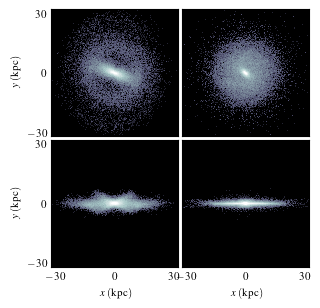

In [12]:
plt.rcParams['figure.figsize'  ] = (3.3,3.3)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

im1 = ax1.imshow(Qlist[0].T, extent=extent, origin='lower', cmap="bone", norm='symlog', 
                interpolation='none', vmin=0, vmax=400)
im2 = ax2.imshow(Qlist[1].T, extent=extent, origin='lower', cmap="bone", norm='symlog', 
                interpolation='none', vmin=0, vmax=400)
im3 = ax3.imshow(Qlist[2].T, extent=extent, origin='lower', cmap="bone", norm='symlog', 
                interpolation='none', vmin=0, vmax=400)
im4 = ax4.imshow(Qlist[3].T, extent=extent, origin='lower', cmap="bone", norm='symlog', 
                interpolation='none', vmin=0, vmax=400)

for ax in fig.get_axes():
    ax.set_xlabel(r'$x \; \mathrm{(kpc)}$')  
    ax.set_ylabel(r'$y \; \mathrm{(kpc)}$')
    ax.set_xlim(-32,32)
    ax.set_xticks(np.arange(-30,31,30))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylim(-32,32)
    ax.set_yticks(np.arange(-30,31,30))
    #ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.label_outer()
ax4.set_xticks(np.arange(-30,31,30))
ax1.set_yticks(np.arange(-30,31,30))

fig.subplots_adjust(left=0.1, bottom=0.2, top=0.98, right=0.89, hspace=0.03, wspace=0.01)
plt.savefig('figuras_2/fig3-morphology.pdf', bbox_inches='tight')

#### Fig. 3 - Evolution of bar strength $A_2$.

In [13]:
n_snapshots_ = 281

time_b = np.empty(n_snapshots_)
A2_b = np.empty(n_snapshots_)

time_nb = np.empty(n_snapshots_)
A2_nb = np.empty(n_snapshots_)

In [14]:
for p, path in enumerate(paths2):

    for j in range (1, n_snapshots_): #alterei o passo inicial para 1 por causa da galáxia com gás
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')
        
        if p == 0:
            time_b[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 1:
            time_nb[j] = round(f['Header'].attrs['Time'], 2)

        #ler info disco e corrigir posição
        f_disk = f['PartType2']

        x_disk = np.array(f_disk['Coordinates'][:,0])
        y_disk = np.array(f_disk['Coordinates'][:,1])
        z_disk = np.array(f_disk['Coordinates'][:,2])
        m_disk = np.array(f_disk['Masses'])
                   
        x_new_disk, y_new_disk, z_new_disk = shift_com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)
            
        #ler info estrelas e gas e corrigir posição
        if p == 1:
            f_star = f['PartType4']

            x_star = np.array(f_star['Coordinates'][:,0])
            y_star = np.array(f_star['Coordinates'][:,1])
            z_star = np.array(f_star['Coordinates'][:,2])
            m_star = np.array(f_star['Masses'])
            
            x_new_star, y_new_star, z_new_star = shift_com(m=m_star, x=x_star, y=y_star, z=z_star)

            f_gas = f['PartType0']
    
            x_gas = np.array(f_gas['Coordinates'][:,0])
            y_gas = np.array(f_gas['Coordinates'][:,1])
            z_gas = np.array(f_gas['Coordinates'][:,2])
            m_gas = np.array(f_gas['Masses'])

            x_new_gas, y_new_gas, z_new_gas = shift_com(m_gas, x_gas, y_gas, z_gas)

            #juntar componentes
            x_tot = np.concatenate((x_new_gas, x_new_star))
            y_tot = np.concatenate((y_new_gas, y_new_star))
            z_tot = np.concatenate((z_new_gas, z_new_star))
            m_tot = np.concatenate((m_gas, m_star))

        #calcular força da barra
        if p == 0:
            A2_b[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots_)          
        if p == 1:
            A2_nb[j] = bar_strength(m=m_tot, x=x_tot, y=y_tot, Rmax=5.0, Nbins=30,
                                    n_snapshots=n_snapshots_)

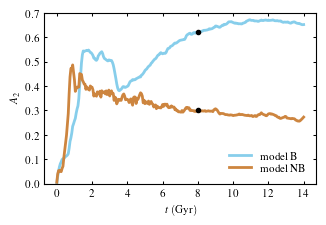

In [15]:
A2_smooth = savgol_filter(A2_b, window_length=9, polyorder=3)
A2_nb_smooth = savgol_filter(A2_nb, window_length=9, polyorder=3)

plt.rcParams['figure.figsize'  ] = (3.3,2.3)

plt.plot(time_b, A2_smooth, color='skyblue', lw=2, label='model B')
plt.plot(time_nb, A2_nb_smooth, color='peru', lw=2, label='model NB')
plt.plot(8.0, 0.30, color='black', marker='.')
plt.plot(8.0, 0.623, color='black', marker='.')
plt.xlabel('$t \, \mathrm{(Gyr)}$')
plt.ylabel('$A_2$')
plt.legend(loc='lower right', frameon=False, labelspacing = 0.2)
plt.xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0])
plt.ylim(0.0, 0.7)
plt.tight_layout()
plt.savefig('figuras_2/fig3-a2.pdf')

#### Fig. 4 - Satellite orbits around the barred galaxy.

In [16]:
n_snapshots = 120

x_01_10 = np.empty(n_snapshots)
y_01_10 = np.empty(n_snapshots)
z_01_10 = np.empty(n_snapshots)

x_01_20 = np.empty(n_snapshots)
y_01_20 = np.empty(n_snapshots)
z_01_20 = np.empty(n_snapshots)

x_01_30 = np.empty(n_snapshots)
y_01_30 = np.empty(n_snapshots)
z_01_30 = np.empty(n_snapshots)

x_05_10 = np.empty(n_snapshots)
y_05_10 = np.empty(n_snapshots)
z_05_10 = np.empty(n_snapshots)

x_05_20 = np.empty(n_snapshots)
y_05_20 = np.empty(n_snapshots)
z_05_20 = np.empty(n_snapshots)

x_05_30 = np.empty(n_snapshots)
y_05_30 = np.empty(n_snapshots)
z_05_30 = np.empty(n_snapshots)

x_1_10 = np.empty(n_snapshots)
y_1_10 = np.empty(n_snapshots)
z_1_10 = np.empty(n_snapshots)

x_1_20 = np.empty(n_snapshots)
y_1_20 = np.empty(n_snapshots)
z_1_20 = np.empty(n_snapshots)

x_1_30 = np.empty(n_snapshots)
y_1_30 = np.empty(n_snapshots)
z_1_30 = np.empty(n_snapshots)

In [16]:
for p, path in enumerate(paths):
    snapshot = path + 'snapshot_000.hdf5'

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #ler info disco
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    m_disk = np.array(f_disk['Masses'])
    
    x_new_disk, y_new_disk, z_new_disk = shift_com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)
        
    for j in range (0, n_snapshots):
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')
        
        #ler info satélite
        f_bndry = f['PartType5']

        x_bndry = np.array(f_bndry['Coordinates'][:,0])
        y_bndry = np.array(f_bndry['Coordinates'][:,1])
        z_bndry = np.array(f_bndry['Coordinates'][:,2])
        m_bndry = np.array(f_bndry['Masses'])

        if p == 0:
            x_01_10[j], y_01_10[j], z_01_10[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 1:
            x_01_20[j], y_01_20[j], z_01_20[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 2:
            x_01_30[j], y_01_30[j], z_01_30[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 3:
            x_05_10[j], y_05_10[j], z_05_10[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 4:
            x_05_20[j], y_05_20[j], z_05_20[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 5:
            x_05_30[j], y_05_30[j], z_05_30[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 6:
            x_1_10[j], y_1_10[j], z_1_10[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 7:
            x_1_20[j], y_1_20[j], z_1_20[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 8:
            x_1_30[j], y_1_30[j], z_1_30[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)

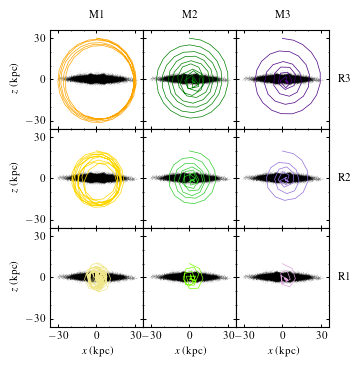

In [17]:
plt.rcParams['figure.figsize'  ] = (3.3,3.3)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)

ax1.plot(x_disk, z_disk, 'k,', alpha=0.05, rasterized=True)
ax1.plot(y_01_30, z_01_30, color='orange', lw=0.5, label='satellite orbit')

ax2.plot(x_disk, z_disk, 'k,', alpha=0.05, rasterized=True)
ax2.plot(y_05_30, z_05_30, color='green', lw=0.5, label='satellite orbit')

ax3.plot(x_disk, z_disk, 'k,', alpha=0.05, rasterized=True)
ax3.plot(y_1_30, z_1_30, color='indigo', lw=0.5, label='satellite orbit')

ax4.plot(x_disk, z_disk, 'k,', alpha=0.05, rasterized=True)
ax4.plot(y_01_20, z_01_20, color='gold', lw=0.5, label='satellite orbit')

ax5.plot(x_disk, z_disk, 'k,', alpha=0.05, rasterized=True)
ax5.plot(y_05_20, z_05_20, color='limegreen', lw=0.5, label='satellite orbit')

ax6.plot(x_disk, z_disk, 'k,', alpha=0.05, rasterized=True)
ax6.plot(y_1_20, z_1_20, color='mediumpurple', lw=0.5, label='satellite orbit')

ax7.plot(x_disk, z_disk, 'k,', alpha=0.05, rasterized=True)
ax7.plot(y_01_10, z_01_10, color='khaki', lw=0.5, label='satellite orbit')

ax8.plot(x_disk, z_disk, 'k,', alpha=0.05, rasterized=True)
ax8.plot(y_05_10, z_05_10, color='lawngreen', lw=0.5, label='satellite orbit')

ax9.plot(x_disk, z_disk, 'k,', alpha=0.05, rasterized=True)
ax9.plot(y_1_10, z_1_10, color='plum', lw=0.5, label='satellite orbit')

for ax in fig.get_axes():
    ax.set_xlabel(r'$x$ (kpc)')  
    ax.set_ylabel(r'$z$ (kpc)')
    ax.set_xlim(-36,36)
    ax.set_xticks(np.arange(-30,31,30))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_ylim(-36,36)
    ax.set_yticks(np.arange(-30,31,30))
    ax.yaxis.set_minor_locator(MultipleLocator(10))
    ax.label_outer()
ax9.set_xticks(np.arange(-30,31,30))
ax1.set_yticks(np.arange(-30,31,30))

ax1.annotate('M1', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax2.annotate('M2', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate('M3', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate('R3', xy=(1.1, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax6.annotate('R2', xy=(1.1, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax9.annotate('R1', xy=(1.1, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')

fig.subplots_adjust(left=0.055, bottom=0.09, top=0.99, right=0.9, hspace=0.00, wspace=0.0)
#plt.savefig('fig4-orbitas_b.pdf', bbox_inches='tight')

#### Fig. 5 - Satellite orbits around the non-barred galaxy.

In [17]:
n_snapshots = 120

x_01_10 = np.empty(n_snapshots)
y_01_10 = np.empty(n_snapshots)
z_01_10 = np.empty(n_snapshots)

x_01_20 = np.empty(n_snapshots)
y_01_20 = np.empty(n_snapshots)
z_01_20 = np.empty(n_snapshots)

x_01_30 = np.empty(n_snapshots)
y_01_30 = np.empty(n_snapshots)
z_01_30 = np.empty(n_snapshots)

x_05_10 = np.empty(n_snapshots)
y_05_10 = np.empty(n_snapshots)
z_05_10 = np.empty(n_snapshots)

x_05_20 = np.empty(n_snapshots)
y_05_20 = np.empty(n_snapshots)
z_05_20 = np.empty(n_snapshots)

x_05_30 = np.empty(n_snapshots)
y_05_30 = np.empty(n_snapshots)
z_05_30 = np.empty(n_snapshots)

x_1_10 = np.empty(n_snapshots)
y_1_10 = np.empty(n_snapshots)
z_1_10 = np.empty(n_snapshots)

x_1_20 = np.empty(n_snapshots)
y_1_20 = np.empty(n_snapshots)
z_1_20 = np.empty(n_snapshots)

x_1_30 = np.empty(n_snapshots)
y_1_30 = np.empty(n_snapshots)
z_1_30 = np.empty(n_snapshots)

In [18]:
for p, path in enumerate(paths_):
    snapshot = path + 'snapshot_000.hdf5'

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    f_star = f['PartType4']

    x_star = np.array(f_star['Coordinates'][:,0])
    y_star = np.array(f_star['Coordinates'][:,1])
    z_star = np.array(f_star['Coordinates'][:,2])
    m_star = np.array(f_star['Masses'])
            
    x_new_star, y_new_star, z_new_star = shift_com(m=m_star, x=x_star, y=y_star, z=z_star)

    f_gas = f['PartType0']
    
    x_gas = np.array(f_gas['Coordinates'][:,0])
    y_gas = np.array(f_gas['Coordinates'][:,1])
    z_gas = np.array(f_gas['Coordinates'][:,2])
    m_gas = np.array(f_gas['Masses'])

    x_new_gas, y_new_gas, z_new_gas = shift_com(m_gas, x_gas, y_gas, z_gas)

    #juntar componentes
    x_tot = np.concatenate((x_new_gas, x_new_star))
    y_tot = np.concatenate((y_new_gas, y_new_star))
    z_tot = np.concatenate((z_new_gas, z_new_star))
        
    for j in range (0, n_snapshots):
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')
        
        #ler info satélite
        f_bndry = f['PartType5']

        x_bndry = np.array(f_bndry['Coordinates'][:,0])
        y_bndry = np.array(f_bndry['Coordinates'][:,1])
        z_bndry = np.array(f_bndry['Coordinates'][:,2])
        m_bndry = np.array(f_bndry['Masses'])

        if p == 0:
            x_01_10[j], y_01_10[j], z_01_10[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 1:
            x_01_20[j], y_01_20[j], z_01_20[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 2:
            x_01_30[j], y_01_30[j], z_01_30[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 3:
            x_05_10[j], y_05_10[j], z_05_10[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 4:
            x_05_20[j], y_05_20[j], z_05_20[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 5:
            x_05_30[j], y_05_30[j], z_05_30[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 6:
            x_1_10[j], y_1_10[j], z_1_10[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 7:
            x_1_20[j], y_1_20[j], z_1_20[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 8:
            x_1_30[j], y_1_30[j], z_1_30[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)

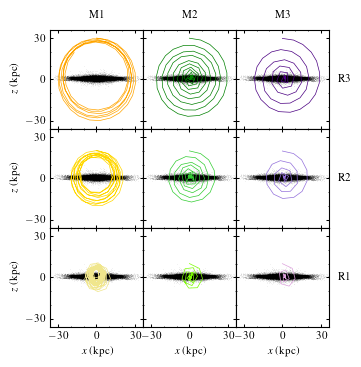

In [19]:
plt.rcParams['figure.figsize'  ] = (3.3,3.3)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)

ax1.plot(x_tot, z_tot, 'k,', alpha=0.05, rasterized=True)
ax1.plot(y_01_30, z_01_30, color='orange', lw=0.5, label='satellite orbit')

ax2.plot(x_tot, z_tot, 'k,', alpha=0.05, rasterized=True)
ax2.plot(y_05_30, z_05_30, color='green', lw=0.5, label='satellite orbit')

ax3.plot(x_tot, z_tot, 'k,', alpha=0.05, rasterized=True)
ax3.plot(y_1_30, z_1_30, color='indigo', lw=0.5, label='satellite orbit')

ax4.plot(x_tot, z_tot, 'k,', alpha=0.05, rasterized=True)
ax4.plot(y_01_20, z_01_20, color='gold', lw=0.5, label='satellite orbit')

ax5.plot(x_tot, z_tot, 'k,', alpha=0.05, rasterized=True)
ax5.plot(y_05_20, z_05_20, color='limegreen', lw=0.5, label='satellite orbit')

ax6.plot(x_tot, z_tot, 'k,', alpha=0.05, rasterized=True)
ax6.plot(y_1_20, z_1_20, color='mediumpurple', lw=0.5, label='satellite orbit')

ax7.plot(x_tot, z_tot, 'k,', alpha=0.05, rasterized=True)
ax7.plot(y_01_10, z_01_10, color='khaki', lw=0.5, label='satellite orbit')

ax8.plot(x_tot, z_tot, 'k,', alpha=0.05, rasterized=True)
ax8.plot(y_05_10, z_05_10, color='lawngreen', lw=0.5, label='satellite orbit')

ax9.plot(x_tot, z_tot, 'k,', alpha=0.05, rasterized=True)
ax9.plot(y_1_10, z_1_10, color='plum', lw=0.5, label='satellite orbit')

for ax in fig.get_axes():
    ax.set_xlabel(r'$x$ (kpc)')  
    ax.set_ylabel(r'$z$ (kpc)')
    ax.set_xlim(-36,36)
    ax.set_xticks(np.arange(-30,31,30))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_ylim(-36,36)
    ax.set_yticks(np.arange(-30,31,30))
    ax.yaxis.set_minor_locator(MultipleLocator(10))
    ax.label_outer()
ax9.set_xticks(np.arange(-30,31,30))
ax1.set_yticks(np.arange(-30,31,30))

ax1.annotate('M1', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax2.annotate('M2', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate('M3', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate('R3', xy=(1.1, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax6.annotate('R2', xy=(1.1, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax9.annotate('R1', xy=(1.1, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')

fig.subplots_adjust(left=0.055, bottom=0.09, top=0.99, right=0.9, hspace=0.00, wspace=0.0)
plt.savefig('figuras_2/fig5-orbitas_nb.pdf', bbox_inches='tight')

#### Fig. 6 - Evolution of $A_2$ in isolated and perturbed models of the barred galaxy.

In [21]:
n_snapshots = 120

time_01_10 = np.empty(n_snapshots)
time_01_20 = np.empty(n_snapshots)
time_01_30 = np.empty(n_snapshots)
time_05_10 = np.empty(n_snapshots)
time_05_20 = np.empty(n_snapshots)
time_05_30 = np.empty(n_snapshots)
time_1_10 = np.empty(n_snapshots)
time_1_20 = np.empty(n_snapshots)
time_1_30 = np.empty(n_snapshots)

A2_01_10 = np.empty(n_snapshots)
A2_01_20 = np.empty(n_snapshots)
A2_01_30 = np.empty(n_snapshots)
A2_05_10 = np.empty(n_snapshots)
A2_05_20 = np.empty(n_snapshots)
A2_05_30 = np.empty(n_snapshots)
A2_1_10 = np.empty(n_snapshots)
A2_1_20 = np.empty(n_snapshots)
A2_1_30 = np.empty(n_snapshots)

In [22]:
#tempo
for p, path in enumerate(paths):

    for j in range (0, n_snapshots): 
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')
        
        if p == 0:
            time_01_10[j] = 8.0 + round(f['Header'].attrs['Time'], 2)
            
        if p == 1:
            time_01_20[j] = 8.0 + round(f['Header'].attrs['Time'], 2)    
        
        if p == 2:
            time_01_30[j] = 8.0 + round(f['Header'].attrs['Time'], 2)
            
        if p == 3:
            time_05_10[j] = 8.0 + round(f['Header'].attrs['Time'], 2)
            
        if p == 4:
            time_05_20[j] = 8.0 + round(f['Header'].attrs['Time'], 2)
            
        if p == 5:
            time_05_30[j] = 8.0 + round(f['Header'].attrs['Time'], 2)
            
        if p == 6:
            time_1_10[j] = 8.0 + round(f['Header'].attrs['Time'], 2)
            
        if p == 7:
            time_1_20[j] = 8.0 + round(f['Header'].attrs['Time'], 2)
            
        if p == 8:
            time_1_30[j] = 8.0 + round(f['Header'].attrs['Time'], 2)

In [23]:
#força da barra
for p, path in enumerate(paths):

    for j in range (0, n_snapshots): 
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')

        #ler info disco e corrigir posição
        f_disk = f['PartType2']

        x_disk = np.array(f_disk['Coordinates'][:,0])
        y_disk = np.array(f_disk['Coordinates'][:,1])
        z_disk = np.array(f_disk['Coordinates'][:,2])
        m_disk = np.array(f_disk['Masses'])
                   
        x_new_disk, y_new_disk, z_new_disk = shift_com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)

        #calcular força da barra
        if p == 0:
            A2_01_10[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 1:
            A2_01_20[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 2:
            A2_01_30[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 3:
            A2_05_10[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 4:
            A2_05_20[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 5:
            A2_05_30[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 6:
            A2_1_10[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 7:
            A2_1_20[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 8:
            A2_1_30[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)

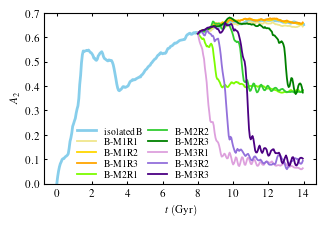

In [24]:
#curva suavizada
A2_smooth = savgol_filter(A2_b, window_length=9, polyorder=3)

A2_01_10_smooth = savgol_filter(A2_01_10, window_length=9, polyorder=3)
A2_01_20_smooth = savgol_filter(A2_01_20, window_length=9, polyorder=3)
A2_01_30_smooth = savgol_filter(A2_01_30, window_length=9, polyorder=3)

A2_05_10_smooth = savgol_filter(A2_05_10, window_length=9, polyorder=3)
A2_05_20_smooth = savgol_filter(A2_05_20, window_length=9, polyorder=3)
A2_05_30_smooth = savgol_filter(A2_05_30, window_length=9, polyorder=3)

A2_1_10_smooth = savgol_filter(A2_1_10, window_length=9, polyorder=3)
A2_1_20_smooth = savgol_filter(A2_1_20, window_length=9, polyorder=3)
A2_1_30_smooth = savgol_filter(A2_1_30, window_length=9, polyorder=3)


plt.rcParams['figure.figsize'  ] = (3.3,2.3)
plt.plot(time_b, A2_smooth, color='skyblue', lw=2, label='isolated B')

plt.plot(time_01_10, A2_01_10_smooth, color='khaki', ls = '-', lw = 1.3,
         label='B-M1R1')
plt.plot(time_01_20, A2_01_20_smooth, color='gold', ls = '-', lw = 1.3,
         label='B-M1R2')
plt.plot(time_01_30, A2_01_30_smooth, color='orange', ls = '-',  lw = 1.3,
         label='B-M1R3')
plt.plot(time_05_10, A2_05_10_smooth, color='lawngreen', ls = '-', lw = 1.3,
         label='B-M2R1')
plt.plot(time_05_20, A2_05_20_smooth, color='limegreen', ls = '-', lw = 1.3,
         label='B-M2R2')
plt.plot(time_05_30, A2_05_30_smooth, color='green', ls = '-', lw = 1.3,
         label='B-M2R3')
plt.plot(time_1_10, A2_1_10_smooth, color='plum', ls = '-', lw = 1.3,
         label='B-M3R1')
plt.plot(time_1_20, A2_1_20_smooth, color='mediumpurple', ls = '-', lw = 1.3,
         label='B-M3R2')
plt.plot(time_1_30, A2_1_30_smooth, color='indigo', ls = '-', lw = 1.3,
         label='B-M3R3')

plt.xlabel('$t \, \mathrm{(Gyr)}$')
plt.ylabel('$A_2$')
plt.ylim(0.0, 0.7)
plt.xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0])
plt.legend(frameon=False, loc="center right", bbox_to_anchor=(0.64,0.18), ncol=2, labelspacing=0.2,
           columnspacing=0.5, fontsize=7)
plt.tight_layout()
#plt.savefig('fig6-a2-b.pdf')

#### Fig. 7 - Orbital radius and $A_2$ for model B-M2R2.

In [25]:
n_snapshots = 120

r_05_20 = np.empty(n_snapshots)

In [26]:
for j in range (0, n_snapshots): 
    index = str(j).zfill(3)
    snapshot = path_05_20 + f'snapshot_{index}.hdf5'

    r_05_20[j] = np.sqrt(x_05_20[j]**2+y_05_20[j]**2+z_05_20[j]**2)

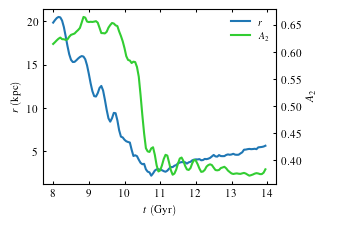

In [27]:
r_smooth = savgol_filter(r_05_20, window_length=9, polyorder=3)

plt.rcParams['figure.figsize'  ] = (3.3,2.3)
plt.figure()
host = host_subplot(111)
par = host.twinx()
        
host.set_xlabel(r'$t~({\rm Gyr})$')
host.set_ylabel(r'$r~({\rm kpc})$')
par.set_ylabel('$A_2$')
# par.set_ylim(0.35, 0.7)
# par.set_yticks([0.4, 0.5, 0.6, 0.7])
        
p1, = host.plot(time_05_20, r_smooth, label='$r$')
p2, = par.plot(time_05_20, A2_05_20_smooth, label='$A_2$', color='limegreen')
        
host.legend(frameon=False, labelcolor="black", fontsize=7)
host.yaxis.get_label()#.set_color(p1.get_color())
par.yaxis.get_label()#.set_color(p2.get_color())

plt.tight_layout()
#plt.savefig('fig7-r-A2-.png')

#### Fig. 8 - Evolution of mean heights for model B-M3R1.

In [38]:
snapshots=[0,60,120] #galaxia barrada + satelite

Qlist = []
    
for s, snap in enumerate(snapshots): 
    index = str(snap).zfill(3)
    snapshot = path_1_10 + f'snapshot_{index}.hdf5' 
    
    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #ler info disk
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    vx_disk = np.array(f_disk['Velocities'][:,0])
    vy_disk = np.array(f_disk['Velocities'][:,1])
    vz_disk = np.array(f_disk['Velocities'][:,2])
    m_disk = np.array(f_disk['Masses'])
    Ndisk = len(np.array(f_disk['ParticleIDs']))
        
    #corrigir posição - centro de massa - disk
    x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
    vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)

    #corrigir posição - momento angular - disk
    theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                           vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
    
    x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                      vy=vy_new_disk, theta=theta)
   
    x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)

    #corrigir theta bar
    thetas = theta_bar(m=m_disk, x=x, y=y, Rmax=10.0)
    x_new_disk2, y_new_disk2 = corr_theta_b(N=Ndisk, x=x, y=y, theta=thetas)
    vx_new_disk2, vy_new_disk2 = corr_theta_b(N=Ndisk, x=vx, y=vy, theta=thetas) 
    
    #mapas de posição e velocidade
    Nbins = 80

    Rmax =  32.0 #kpc
    xmin = ymin = -Rmax
    xmax = ymax = Rmax

    results, xb, yb, binnum = stats.binned_statistic_2d(x_new_disk2, y_new_disk2, z, 
                                    statistic='mean', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])
    extent = [xb[0], xb[-1], yb[0], yb[-1]]

    Q = results
    Qlist.append(Q)

/tmp/ipykernel_12784/1009371828.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


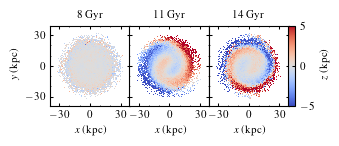

In [72]:
plt.rcParams['figure.figsize'  ] = (3.3,1.5)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

ax1.set_title("8 Gyr", fontsize=8)
ax2.set_title("11 Gyr", fontsize=8)
ax3.set_title("14 Gyr", fontsize=8)

cmap = 'coolwarm'

im1 = ax1.imshow(Qlist[0].T, extent=extent, origin='lower', cmap=cmap, interpolation='nearest',
                 vmin=-5.0, vmax=5.0)
im2 = ax2.imshow(Qlist[1].T, extent=extent, origin='lower', cmap=cmap, interpolation='nearest', 
                 vmin=-5.0, vmax=5.0)
im3 = ax3.imshow(Qlist[2].T, extent=extent, origin='lower', cmap=cmap, interpolation='nearest', 
                 vmin=-5.0, vmax=5.0)

for ax in fig.get_axes():
    ax.set_xlabel(r'$x$ (kpc)')  
    ax.set_ylabel(r'$y$ (kpc)')
    ax.set_xlim(-39,39)
    ax.set_xticks(np.arange(-30,31,30))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_ylim(-39,39)
    ax.set_yticks(np.arange(-30,31,30))
    ax.yaxis.set_minor_locator(MultipleLocator(10))
    ax.label_outer()
ax3.set_xticks(np.arange(-30,31,30))
ax1.set_yticks(np.arange(-30,31,30))

fig.subplots_adjust(right=0.9)

#cax1 = fig.add_axes([0.85, 0.27, 0.025, 0.54])
cax1 = fig.add_axes([0.86, 0.28, 0.022, 0.535])
cb1  = plt.colorbar(im1, cax=cax1)
cb1.set_label(r'$z$ (kpc)')

fig.subplots_adjust(left=0.5, bottom=0.5, top=1.8, right=3.0, hspace=0.0, wspace=0.0)
#fig.subplots_adjust(left=0.06, bottom=0.15, top=0.99, right=0.9, hspace=0.00, wspace=0.0)
plt.tight_layout()

plt.savefig('b-05-10.pdf')

#### Fig. 9 - Map of mean heights for isolated and perturbed models.

In [29]:
path_maps = [path_b + 'snapshot_280.hdf5', path_nb + 'snapshot_280.hdf5',
             path_1_10 + 'snapshot_120.hdf5', path_1_10_ + 'snapshot_120.hdf5']

In [30]:
Qlist1 = []

snapshot = path_b + 'snapshot_280.hdf5'

#ler snapshot
f = h5py.File(snapshot, 'r')

#ler info disk
f_disk = f['PartType2']

x_disk = np.array(f_disk['Coordinates'][:,0])
y_disk = np.array(f_disk['Coordinates'][:,1])
z_disk = np.array(f_disk['Coordinates'][:,2])
vx_disk = np.array(f_disk['Velocities'][:,0])
vy_disk = np.array(f_disk['Velocities'][:,1])
vz_disk = np.array(f_disk['Velocities'][:,2])
m_disk = np.array(f_disk['Masses'])
Ndisk = len(np.array(f_disk['ParticleIDs']))
        
#corrigir posição - centro de massa - disk
x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)

#corrigir posição - momento angular - disk
theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                           vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
    
x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                      vy=vy_new_disk, theta=theta)
   
x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)

#corrigir theta bar
thetas = theta_bar(m=m_disk, x=x, y=y, Rmax=10.0)
x_new_disk2, y_new_disk2 = corr_theta_b(N=Ndisk, x=x, y=y, theta=thetas)

#mapas de posição
Nbins = 80
Rmax =  36.0 #kpc
xmin = ymin = -Rmax
xmax = ymax = Rmax

results, xb, yb, binnum = stats.binned_statistic_2d(x_new_disk2, y_new_disk2, z, 
                                    statistic='mean', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])

extent = [xb[0], xb[-1], yb[0], yb[-1]]

Q = results
Qlist1.append(Q)

In [31]:
snapshot = path_nb + 'snapshot_280.hdf5'

#ler snapshot
f = h5py.File(snapshot, 'r')

f_star = f['PartType4']

x_star = np.array(f_star['Coordinates'][:,0])
y_star = np.array(f_star['Coordinates'][:,1])
z_star = np.array(f_star['Coordinates'][:,2])
vx_star = np.array(f_star['Velocities'][:,0])
vy_star = np.array(f_star['Velocities'][:,1])
vz_star = np.array(f_star['Velocities'][:,2])
m_star = np.array(f_star['Masses'])
Nstar = len(np.array(f_star['ParticleIDs']))

f_gas = f['PartType0']
    
x_gas = np.array(f_gas['Coordinates'][:,0])
y_gas = np.array(f_gas['Coordinates'][:,1])
z_gas = np.array(f_gas['Coordinates'][:,2])
vx_gas = np.array(f_gas['Velocities'][:,0])
vy_gas = np.array(f_gas['Velocities'][:,1])
vz_gas = np.array(f_gas['Velocities'][:,2])
Ngas = len(np.array(f_gas['ParticleIDs']))
m_gas = np.array(f_gas['Masses'])

#corrigir posição - centro de massa - stars
x_new_star, y_new_star, z_new_star = shift_com(m_star, x_star, y_star, z_star)
vx_new_star, vy_new_star, vz_new_star = shift_com(m_star, vx_star, vy_star, vz_star)
        
#corrigir posição - momento angular - stars
theta_s, phi_s = theta_phi(N=Nstar, x=x_new_star, y=y_new_star, z=z_new_star, 
                                   vx=vx_new_star, vy=vy_new_star, vz=vz_new_star, m=m_star)
        
x_s, y_s, vx_s, vy_s = angular_momentum_1(N=Nstar, x=x_new_star, y=y_new_star,
                                                vx=vx_new_star, vy=vy_new_star, theta=theta_s)
        
x_s, z_s, vx_s, vz_s = angular_momentum_2(N=Nstar, x=x_s, z=z_new_star, vx=vx_s, 
                                                  vz=vz_new_star, phi=phi_s)

#corrigir posição - centro de massa - gas
x_new_gas, y_new_gas, z_new_gas = shift_com(m_gas, x_gas, y_gas, z_gas)
vx_new_gas, vy_new_gas, vz_new_gas = shift_com(m_gas, vx_gas, vy_gas, vz_gas)
        
#corrigir posição - momento angular - gas
theta, phi = theta_phi(N=Ngas, x=x_new_gas, y=y_new_gas, z=z_new_gas, 
                                   vx=vx_new_gas, vy=vy_new_gas, vz=vz_new_gas, m=m_gas)
        
x, y, vx, vy = angular_momentum_1(N=Ngas, x=x_new_gas, y=y_new_gas,
                                                vx=vx_new_gas, vy=vy_new_gas, theta=theta)
        
x, z, vx, vz = angular_momentum_2(N=Ngas, x=x, z=z_new_gas, vx=vx, 
                                                  vz=vz_new_gas, phi=phi)

#juntar componentes
x_tot = np.concatenate((x, x_s))
y_tot = np.concatenate((y, y_s))
z_tot = np.concatenate((z, z_s))
vx_tot = np.concatenate((vx, vx_s))
vy_tot = np.concatenate((vy, vy_s))
vz_tot = np.concatenate((vz, vz_s))
m_tot = np.concatenate((m_gas, m_star))


#mapas de posição
Nbins = 80
Rmax =  36.0 #kpc
xmin = ymin = -Rmax
xmax = ymax = Rmax

results, xb, yb, binnum = stats.binned_statistic_2d(x_tot, y_tot, z_tot, 
                                    statistic='mean', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])

extent = [xb[0], xb[-1], yb[0], yb[-1]]

Q = results
Qlist1.append(Q)

In [32]:
snapshot = path_1_10 + 'snapshot_120.hdf5'

#ler snapshot
f = h5py.File(snapshot, 'r')

#ler info disk
f_disk = f['PartType2']

x_disk = np.array(f_disk['Coordinates'][:,0])
y_disk = np.array(f_disk['Coordinates'][:,1])
z_disk = np.array(f_disk['Coordinates'][:,2])
vx_disk = np.array(f_disk['Velocities'][:,0])
vy_disk = np.array(f_disk['Velocities'][:,1])
vz_disk = np.array(f_disk['Velocities'][:,2])
m_disk = np.array(f_disk['Masses'])
Ndisk = len(np.array(f_disk['ParticleIDs']))
        
#corrigir posição - centro de massa - disk
x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)

#corrigir posição - momento angular - disk
theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                           vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
    
x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                      vy=vy_new_disk, theta=theta)
   
x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)

#corrigir theta bar
thetas = theta_bar(m=m_disk, x=x, y=y, Rmax=10.0)
x_new_disk2, y_new_disk2 = corr_theta_b(N=Ndisk, x=x, y=y, theta=thetas)

#mapas de posição
Nbins = 80
Rmax =  36.0 #kpc
xmin = ymin = -Rmax
xmax = ymax = Rmax

results, xb, yb, binnum = stats.binned_statistic_2d(x_new_disk2, y_new_disk2, z, 
                                    statistic='mean', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])

extent = [xb[0], xb[-1], yb[0], yb[-1]]

Q = results
Qlist1.append(Q)

In [33]:
snapshot = path_1_10_ + 'snapshot_120.hdf5'

#ler snapshot
f = h5py.File(snapshot, 'r')

f_star = f['PartType4']

x_star = np.array(f_star['Coordinates'][:,0])
y_star = np.array(f_star['Coordinates'][:,1])
z_star = np.array(f_star['Coordinates'][:,2])
vx_star = np.array(f_star['Velocities'][:,0])
vy_star = np.array(f_star['Velocities'][:,1])
vz_star = np.array(f_star['Velocities'][:,2])
m_star = np.array(f_star['Masses'])
Nstar = len(np.array(f_star['ParticleIDs']))

f_gas = f['PartType0']
    
x_gas = np.array(f_gas['Coordinates'][:,0])
y_gas = np.array(f_gas['Coordinates'][:,1])
z_gas = np.array(f_gas['Coordinates'][:,2])
vx_gas = np.array(f_gas['Velocities'][:,0])
vy_gas = np.array(f_gas['Velocities'][:,1])
vz_gas = np.array(f_gas['Velocities'][:,2])
Ngas = len(np.array(f_gas['ParticleIDs']))
m_gas = np.array(f_gas['Masses'])

#corrigir posição - centro de massa - stars
x_new_star, y_new_star, z_new_star = shift_com(m_star, x_star, y_star, z_star)
vx_new_star, vy_new_star, vz_new_star = shift_com(m_star, vx_star, vy_star, vz_star)
        
#corrigir posição - momento angular - stars
theta_s, phi_s = theta_phi(N=Nstar, x=x_new_star, y=y_new_star, z=z_new_star, 
                                   vx=vx_new_star, vy=vy_new_star, vz=vz_new_star, m=m_star)
        
x_s, y_s, vx_s, vy_s = angular_momentum_1(N=Nstar, x=x_new_star, y=y_new_star,
                                                vx=vx_new_star, vy=vy_new_star, theta=theta_s)
        
x_s, z_s, vx_s, vz_s = angular_momentum_2(N=Nstar, x=x_s, z=z_new_star, vx=vx_s, 
                                                  vz=vz_new_star, phi=phi_s)

#corrigir posição - centro de massa - gas
x_new_gas, y_new_gas, z_new_gas = shift_com(m_gas, x_gas, y_gas, z_gas)
vx_new_gas, vy_new_gas, vz_new_gas = shift_com(m_gas, vx_gas, vy_gas, vz_gas)
        
#corrigir posição - momento angular - gas
theta, phi = theta_phi(N=Ngas, x=x_new_gas, y=y_new_gas, z=z_new_gas, 
                                   vx=vx_new_gas, vy=vy_new_gas, vz=vz_new_gas, m=m_gas)
        
x, y, vx, vy = angular_momentum_1(N=Ngas, x=x_new_gas, y=y_new_gas,
                                                vx=vx_new_gas, vy=vy_new_gas, theta=theta)
        
x, z, vx, vz = angular_momentum_2(N=Ngas, x=x, z=z_new_gas, vx=vx, 
                                                  vz=vz_new_gas, phi=phi)

#juntar componentes
x_tot = np.concatenate((x, x_s))
y_tot = np.concatenate((y, y_s))
z_tot = np.concatenate((z, z_s))
vx_tot = np.concatenate((vx, vx_s))
vy_tot = np.concatenate((vy, vy_s))
vz_tot = np.concatenate((vz, vz_s))
m_tot = np.concatenate((m_gas, m_star))


#mapas de posição
Nbins = 80
Rmax =  36.0 #kpc
xmin = ymin = -Rmax
xmax = ymax = Rmax

results, xb, yb, binnum = stats.binned_statistic_2d(x_tot, y_tot, z_tot, 
                                    statistic='mean', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])

extent = [xb[0], xb[-1], yb[0], yb[-1]]

Q = results
Qlist1.append(Q)

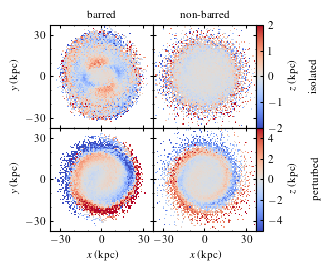

In [34]:
plt.rcParams['figure.figsize'  ] = (2.45,2.45)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

im1 = ax1.imshow(Qlist1[0].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-2.0, vmax=2.0)
im2 = ax2.imshow(Qlist1[1].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-2.0, vmax=2.0)
im3 = ax3.imshow(Qlist1[2].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im4 = ax4.imshow(Qlist1[3].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)

for ax in fig.get_axes():
    ax.set_xlabel(r'$x$ (kpc)')  
    ax.set_ylabel(r'$y$ (kpc)')
    ax.set_xlim(-37,37)
    ax.set_xticks(np.arange(-30,31,30))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_ylim(-37,37)
    ax.set_yticks(np.arange(-30,31,30))
    ax.yaxis.set_minor_locator(MultipleLocator(10))
    ax.label_outer()
ax4.set_xticks(np.arange(-30,31,30))
ax1.set_yticks(np.arange(-30,31,30))

cax1 = fig.add_axes([0.9, 0.57, 0.03, 0.42])
cb1  = plt.colorbar(im1, cax=cax1)
cb1.set_label(r'$z$ (kpc)')

cax2 = fig.add_axes([0.9, 0.15, 0.03, 0.42])
cb2  = plt.colorbar(im4, cax=cax2, ticks=[-4, -2, 0, 2, 4])
cb2.set_label(r'$z$ (kpc)')

ax1.annotate('barred', xy=(0.5, 1.05), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax2.annotate('non-barred', xy=(0.5, 1.05), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax2.annotate('isolated', xy=(1.515, 0.5), xycoords='axes fraction', color='k', ha='left', va='center', 
             rotation=90)
ax4.annotate('perturbed', xy=(1.54, 0.5), xycoords='axes fraction', color='k', ha='left', va='center',
             rotation=90)

fig.subplots_adjust(left=0.06, bottom=0.15, top=0.99, right=0.9, hspace=0.00, wspace=0.0)

plt.savefig('figuras_2/fig8-b-nb-iso-per-2.pdf', bbox_inches='tight')

#### Fig. 10 - Map of mean heights for all models of the perturbed barred galaxy at $t=14$ Gyr

In [82]:
path_maps = [path_01_30, path_05_30, path_1_30, path_01_20, 
         path_05_20, path_1_20, path_01_10, path_05_10, path_1_10]

In [83]:
Qlist2 = []
    
for p, path_name in enumerate(path_maps): 
    snapshot = f'{path_name}snapshot_120.hdf5' 
    
    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #ler info disk
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    vx_disk = np.array(f_disk['Velocities'][:,0])
    vy_disk = np.array(f_disk['Velocities'][:,1])
    vz_disk = np.array(f_disk['Velocities'][:,2])
    m_disk = np.array(f_disk['Masses'])
    Ndisk = len(np.array(f_disk['ParticleIDs']))
        
    #corrigir posição - centro de massa - disk
    x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
    vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)

    #corrigir posição - momento angular - disk
    theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                           vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
    
    x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                      vy=vy_new_disk, theta=theta)
   
    x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)

    #corrigir theta bar
    thetas = theta_bar(m=m_disk, x=x, y=y, Rmax=10.0)
    x_new_disk2, y_new_disk2 = corr_theta_b(N=Ndisk, x=x, y=y, theta=thetas)
    vx_new_disk2, vy_new_disk2 = corr_theta_b(N=Ndisk, x=vx, y=vy, theta=thetas)
    
    #mapas de posição
    Nbins = 80

    Rmax =  36.0 #kpc
    xmin = ymin = -Rmax
    xmax = ymax = Rmax

    results, xb, yb, binnum = stats.binned_statistic_2d(x_new_disk2, y_new_disk2, z, 
                                    statistic='mean', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])

    extent = [xb[0], xb[-1], yb[0], yb[-1]]

    Q = results
    Qlist2.append(Q)

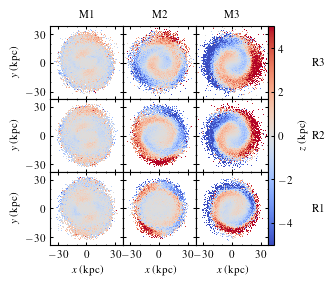

In [98]:
plt.rcParams['figure.figsize'  ] = (2.6,2.6)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)

im1 = ax1.imshow(Qlist2[0].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im2 = ax2.imshow(Qlist2[1].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im3 = ax3.imshow(Qlist2[2].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im4 = ax4.imshow(Qlist2[3].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im5 = ax5.imshow(Qlist2[4].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im6 = ax6.imshow(Qlist2[5].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im7 = ax7.imshow(Qlist2[6].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im8 = ax8.imshow(Qlist2[7].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im9 = ax9.imshow(Qlist2[8].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)

for ax in fig.get_axes():
    ax.set_xlabel(r'$x$ (kpc)')  
    ax.set_ylabel(r'$y$ (kpc)')
    ax.set_xlim(-38,38)
    ax.set_xticks(np.arange(-30,31,30))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_ylim(-38,38)
    ax.set_yticks(np.arange(-30,31,30))
    ax.yaxis.set_minor_locator(MultipleLocator(10))
    ax.label_outer()
ax9.set_xticks(np.arange(-30,31,30))
ax1.set_yticks(np.arange(-30,31,30))

cax2 = fig.add_axes([0.9, 0.15, 0.02, 0.84])
cb2  = plt.colorbar(im6, cax=cax2)
cb2.set_label(r'$z$ (kpc)')

#annotate
ax1.annotate('M1', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax2.annotate('M2', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate('M3', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate('R3', xy=(1.6, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax6.annotate('R2', xy=(1.6, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax9.annotate('R1', xy=(1.6, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')

#fig.subplots_adjust(left=0.055, bottom=0.15, top=0.99, right=0.9, hspace=0.00, wspace=0.0)
fig.subplots_adjust(left=0.06, bottom=0.15, top=0.99, right=0.9, hspace=0.00, wspace=0.0)

#plt.savefig('fig10-maps_b.pdf', bbox_inches='tight')

#### Fig. 10 - Map of mean heights for all models of the perturbed non-barred galaxy at $t=14$ Gyr

In [26]:
path_maps_ = [path_01_30_, path_05_30_, path_1_30_, path_01_20_, path_05_20_,
              path_1_20_, path_01_10_, path_05_10_, path_1_10_]

In [27]:
Qlist3 = []
    
for p, path_name in enumerate(path_maps_): 
    snapshot = f'{path_name}snapshot_120.hdf5' 
    
    #ler snapshot
    f = h5py.File(snapshot, 'r')

    f_star = f['PartType4']

    x_star = np.array(f_star['Coordinates'][:,0])
    y_star = np.array(f_star['Coordinates'][:,1])
    z_star = np.array(f_star['Coordinates'][:,2])
    vx_star = np.array(f_star['Velocities'][:,0])
    vy_star = np.array(f_star['Velocities'][:,1])
    vz_star = np.array(f_star['Velocities'][:,2])
    m_star = np.array(f_star['Masses'])
    Nstar = len(np.array(f_star['ParticleIDs']))
    
    f_gas = f['PartType0']
        
    x_gas = np.array(f_gas['Coordinates'][:,0])
    y_gas = np.array(f_gas['Coordinates'][:,1])
    z_gas = np.array(f_gas['Coordinates'][:,2])
    vx_gas = np.array(f_gas['Velocities'][:,0])
    vy_gas = np.array(f_gas['Velocities'][:,1])
    vz_gas = np.array(f_gas['Velocities'][:,2])
    Ngas = len(np.array(f_gas['ParticleIDs']))
    m_gas = np.array(f_gas['Masses'])
    
    #corrigir posição - centro de massa - stars
    x_new_star, y_new_star, z_new_star = shift_com(m_star, x_star, y_star, z_star)
    vx_new_star, vy_new_star, vz_new_star = shift_com(m_star, vx_star, vy_star, vz_star)
            
    #corrigir posição - momento angular - stars
    theta_s, phi_s = theta_phi(N=Nstar, x=x_new_star, y=y_new_star, z=z_new_star, 
                                       vx=vx_new_star, vy=vy_new_star, vz=vz_new_star, m=m_star)
            
    x_s, y_s, vx_s, vy_s = angular_momentum_1(N=Nstar, x=x_new_star, y=y_new_star,
                                                    vx=vx_new_star, vy=vy_new_star, theta=theta_s)
            
    x_s, z_s, vx_s, vz_s = angular_momentum_2(N=Nstar, x=x_s, z=z_new_star, vx=vx_s, 
                                                      vz=vz_new_star, phi=phi_s)
    
    #corrigir posição - centro de massa - gas
    x_new_gas, y_new_gas, z_new_gas = shift_com(m_gas, x_gas, y_gas, z_gas)
    vx_new_gas, vy_new_gas, vz_new_gas = shift_com(m_gas, vx_gas, vy_gas, vz_gas)
            
    #corrigir posição - momento angular - gas
    theta, phi = theta_phi(N=Ngas, x=x_new_gas, y=y_new_gas, z=z_new_gas, 
                                       vx=vx_new_gas, vy=vy_new_gas, vz=vz_new_gas, m=m_gas)
            
    x, y, vx, vy = angular_momentum_1(N=Ngas, x=x_new_gas, y=y_new_gas,
                                                    vx=vx_new_gas, vy=vy_new_gas, theta=theta)
            
    x, z, vx, vz = angular_momentum_2(N=Ngas, x=x, z=z_new_gas, vx=vx, 
                                                      vz=vz_new_gas, phi=phi)

    #juntar componentes
    x_tot = np.concatenate((x, x_s))
    y_tot = np.concatenate((y, y_s))
    z_tot = np.concatenate((z, z_s))
    vx_tot = np.concatenate((vx, vx_s))
    vy_tot = np.concatenate((vy, vy_s))
    vz_tot = np.concatenate((vz, vz_s))
    m_tot = np.concatenate((m_gas, m_star))
    
    #mapas de posição
    Nbins = 80

    Rmax =  36.0 #kpc
    xmin = ymin = -Rmax
    xmax = ymax = Rmax

    results, xb, yb, binnum = stats.binned_statistic_2d(x_tot, y_tot, z_tot, 
                                    statistic='mean', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])

    extent = [xb[0], xb[-1], yb[0], yb[-1]]

    Q = results
    Qlist3.append(Q)

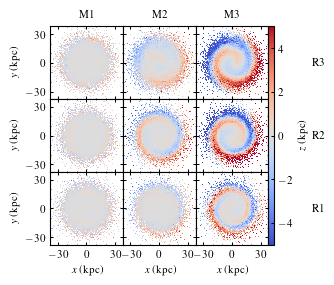

In [28]:
plt.rcParams['figure.figsize'  ] = (2.6,2.6)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)

im1 = ax1.imshow(Qlist3[0].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im2 = ax2.imshow(Qlist3[1].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im3 = ax3.imshow(Qlist3[2].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im4 = ax4.imshow(Qlist3[3].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im5 = ax5.imshow(Qlist3[4].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im6 = ax6.imshow(Qlist3[5].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im7 = ax7.imshow(Qlist3[6].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im8 = ax8.imshow(Qlist3[7].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im9 = ax9.imshow(Qlist3[8].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)

for ax in fig.get_axes():
    ax.set_xlabel(r'$x$ (kpc)')  
    ax.set_ylabel(r'$y$ (kpc)')
    ax.set_xlim(-38,38)
    ax.set_xticks(np.arange(-30,31,30))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_ylim(-38,38)
    ax.set_yticks(np.arange(-30,31,30))
    ax.yaxis.set_minor_locator(MultipleLocator(10))
    ax.label_outer()
ax9.set_xticks(np.arange(-30,31,30))
ax1.set_yticks(np.arange(-30,31,30))

cax2 = fig.add_axes([0.9, 0.15, 0.02, 0.84])
cb2  = plt.colorbar(im6, cax=cax2)
cb2.set_label(r'$z$ (kpc)')

#annotate
ax1.annotate('M1', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax2.annotate('M2', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate('M3', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate('R3', xy=(1.6, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax6.annotate('R2', xy=(1.6, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax9.annotate('R1', xy=(1.6, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')

fig.subplots_adjust(left=0.06, bottom=0.15, top=0.99, right=0.9, hspace=0.00, wspace=0.0)

plt.savefig('figuras_2/fig10-maps_nb.pdf', bbox_inches='tight')

#### Fig. 11 - Evolution of $z(\theta)$ for model B-M3R1

In [6]:
Theta1 = []
Z1 = []

Theta2 = []
Z2 = []

Theta3 = []
Z3 = []

# Theta4 = []
# Z4 = []

# Theta5 = []
# Z5 = []

# Theta6 = []
# Z6 = []

# Theta7 = []
# Z7 = []

In [7]:
#snapshots=[0, 20, 40, 60, 80, 100, 120]
snapshots=[0, 60, 120]

for s, snap in enumerate(snapshots): 
    index = str(snap).zfill(3)
    snapshot = path_1_10 + f'snapshot_{index}.hdf5'

    #ler snapshot
    f = h5py.File(snapshot, 'r')
    
    f_disk = f['PartType2']
    
    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    vx_disk = np.array(f_disk['Velocities'][:,0])
    vy_disk = np.array(f_disk['Velocities'][:,1])
    vz_disk = np.array(f_disk['Velocities'][:,2])
    m_disk = np.array(f_disk['Masses'])
    Ndisk = len(np.array(f_disk['ParticleIDs'])) 
    
    #corrigir posição - centro de massa - disk
    x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
    vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)
            
    #corrigir posição - momento angular - disk
    theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                                       vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
    x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                                  vy=vy_new_disk, theta=theta)
    x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)

    #cálculo z(theta)
    if s == 0:
        Theta1, Z1 = z_theta(x=x, y=y, z=z)
        for i in range (0, 60):
        	if math.isnan(Z1[i]) == True:
        		Z1[i] = 0
    if s == 1:
        Theta2, Z2 = z_theta(x=x, y=y, z=z)
        for i in range (0, 60):
            if math.isnan(Z2[i]) == True:
            	Z2[i] = 0
    if s == 2:
        Theta3, Z3 = z_theta(x=x, y=y, z=z)
        for i in range (0, 60):
        	if math.isnan(Z3[i]) == True:
        		Z3[i] = 0
    # if s == 3:
    #     Theta4, Z4 = z_theta(x=x, y=y, z=z)
    #     for i in range (0, 60):
    #         if math.isnan(Z4[i]) == True:
    #         	Z4[i] = 0
    # if s == 4:
    #     Theta5, Z5 = z_theta(x=x, y=y, z=z)
    #     for i in range (0, 60):
    #     	if math.isnan(Z5[i]) == True:
    #     		Z5[i] = 0
    # if s == 5:
    #     Theta6, Z6 = z_theta(x=x, y=y, z=z)
    #     for i in range (0, 60):
    #         if math.isnan(Z6[i]) == True:
    #         	Z6[i] = 0
    # if s == 6:
    #     Theta7, Z7 = z_theta(x=x, y=y, z=z)
    #     for i in range (0, 60):
    #     	if math.isnan(Z7[i]) == True:
    #     		Z7[i] = 0

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


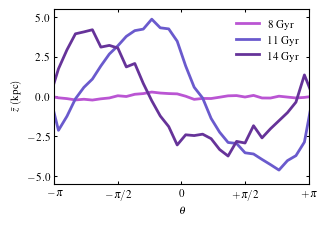

In [11]:
plt.rcParams['figure.figsize'  ] = (3.3,2.3)

# plt.plot(Theta1, Z1, color='pink', lw=1.2, label="8 Gyr")
# plt.plot(Theta2, Z2, color='hotpink', lw=1.2, label="9 Gyr")
# plt.plot(Theta3, Z3, color='orchid', lw=1.2, label="10 Gyr")
# plt.plot(Theta4, Z4, color='darkorchid', lw=1.2, label="11 Gyr")
# plt.plot(Theta5, Z5, color='slateblue', lw=1.2, label="12 Gyr")
# plt.plot(Theta6, Z6, color='royalblue', lw=1.2, label="13 Gyr")
# plt.plot(Theta7, Z7, color='navy', lw=1.2, label="14 Gyr")
plt.plot(Theta1, Z1, color='mediumorchid', lw=2, ls='-', label="8 Gyr")
plt.plot(Theta2, Z2, color='slateblue', lw=2, ls='-', label="11 Gyr")
plt.plot(Theta3, Z3, color='rebeccapurple', lw=2, ls='-', label="14 Gyr")

xlims=[(-1) * np.pi, np.pi]
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.xlim(xlims)
ylims=[-5.5, 5.5]
plt.ylim(ylims)
plt.yticks([-5, -2.5, 0, 2.5, 5])
plt.xlabel(r'$\theta~$')
plt.ylabel(r'$\bar{z}~({\rm kpc})$')
plt.legend()
plt.tight_layout()
plt.savefig('fig11-z_theta-3.pdf')

#### Fig. 12 - Evolution of maximum amplitude of warp $W$ for all perturbed models.

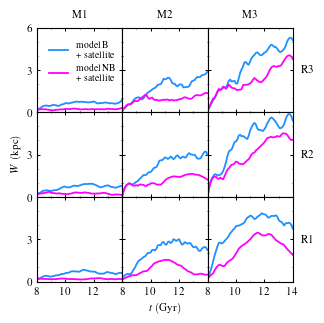

In [35]:
plt.rcParams['figure.figsize'  ] = (3.3,3.3)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)

doc_nb = '30-amp-01-30-nb-new.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-01-30.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
ax1.plot(time_b, ab_smooth, color='dodgerblue', lw = 1.3, label='model B\n + satellite') 
ax1.plot(time_nb, anb_smooth, color='magenta', lw = 1.3, label='model NB\n + satellite') 
ax1.legend(frameon=False, loc="center right", bbox_to_anchor=(1.03,0.6), fontsize=7)

doc_nb = '30-amp-05-30-nb-new.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-05-30.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
ax2.plot(time_b, ab_smooth, color='dodgerblue', lw = 1.3) 
ax2.plot(time_nb, anb_smooth, color='magenta', lw = 1.3)

doc_nb = '30-amp-1-30-nb-new.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-1-30.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
ax3.plot(time_b, ab_smooth, color='dodgerblue', lw = 1.3)
ax3.plot(time_nb, anb_smooth, color='magenta', lw = 1.3)

doc_nb = '30-amp-01-20-nb-new.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-01-20.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
ax4.plot(time_b, ab_smooth, color='dodgerblue', lw = 1.3)
ax4.plot(time_nb, anb_smooth, color='magenta', lw = 1.3) 

doc_nb = '30-amp-05-20-nb-new.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-05-20.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
doc_nb2 = '30-amp-05-20-nogas.txt'
amplitude_nb2, time_nb2 = loadtxt(doc_nb2, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
#anb2_smooth = savgol_filter(amplitude_nb2, window_length=9, polyorder=3)
ax5.plot(time_b, ab_smooth, color='dodgerblue', lw = 1.3) 
ax5.plot(time_nb, anb_smooth, color='magenta', lw = 1.3) 
#ax5.plot(time_nb2, anb2_smooth, color='yellow', label='non-barred galaxy (no gas)\n + satellite') 

doc_nb = '30-amp-1-20-nb-new.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-1-20.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
ax6.plot(time_b, ab_smooth, color='dodgerblue', lw = 1.3)
ax6.plot(time_nb, anb_smooth, color='magenta', lw = 1.3)

doc_nb = '30-amp-01-10-nb-new.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-01-10.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
ax7.plot(time_b, ab_smooth, color='dodgerblue', lw = 1.3)
ax7.plot(time_nb, anb_smooth, color='magenta', lw = 1.3)

doc_nb = '30-amp-05-10-nb-new.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-05-10.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
ax8.plot(time_b, ab_smooth, color='dodgerblue', lw = 1.3) 
ax8.plot(time_nb, anb_smooth, color='magenta', lw = 1.3)

doc_nb = '30-amp-1-10-nb-new.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-1-10.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
ax9.plot(time_b, ab_smooth, color='dodgerblue', lw = 1.3)
ax9.plot(time_nb, anb_smooth, color='magenta', lw = 1.3)

for ax in fig.get_axes():
    # ax.set_xlabel(r'$t \, \mathrm{(Gyr)}$')  
    # ax.set_ylabel(r'$A_{\rm max}~({\rm kpc})$')
    ax.set_xlim(8,14)
    ax.set_xticks(np.arange(8,14,2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylim(0,6)
    ax.set_yticks(np.arange(0,6,3))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.label_outer()
ax9.set_xticks(np.arange(8,15,2))
ax1.set_yticks(np.arange(0,7,3))
ax8.set_xlabel(r'$t \, \mathrm{(Gyr)}$')  
ax4.set_ylabel(r'$W~({\rm kpc})$')

ax1.annotate('M1', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax2.annotate('M2', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate('M3', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate('R3', xy=(1.1, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax6.annotate('R2', xy=(1.1, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax9.annotate('R1', xy=(1.1, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')

fig.subplots_adjust(hspace=0.00, wspace=0.0)

plt.savefig('figuras_2/fig12-W.pdf')

#### Fig 13 - Evolution of maximum amplitude of warp $W$ for isolated models B and NB.

141


/tmp/ipykernel_4883/1553768723.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


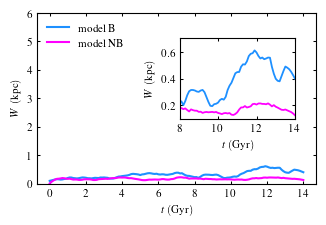

In [37]:
plt.rcParams['figure.figsize'  ] = (3.3,2.3)

doc_nb = '30-amp-nb-new.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-b.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
time_b_ = time_b - 8.0
time_nb_ = time_nb - 8.0

print(len(time_b_))
plt.plot(time_b_, ab_smooth, color='dodgerblue', lw = 1.5, label='model B') 
plt.plot(time_nb_, anb_smooth, color='magenta', lw = 1.5, label='model NB') 
plt.legend(frameon=False, loc="upper left")
plt.xlabel(r'$t \, \mathrm{(Gyr)}$')
plt.ylabel(r'$W~({\rm kpc})$')
plt.ylim(0, 6)

# plot the zoomed portion
sub_axes = plt.axes([0.55, 0.47, 0.35, 0.35]) 
sub_axes.plot(time_b_, ab_smooth, color='dodgerblue', lw = 1.3)
sub_axes.plot(time_nb_, anb_smooth, color='magenta', lw = 1.3)
sub_axes.set_xlim([8,14])
sub_axes.set_ylim([0.1,0.7])
sub_axes.set_xlabel(r'$t \, \mathrm{(Gyr)}$')
sub_axes.set_ylabel(r'$W~({\rm kpc})$')

plt.tight_layout()
plt.savefig('figuras_2/fig13-W-nb_b.pdf')

#### Fig 14 - $A_1$ for pertubed model B.

In [6]:
n_snapshots_ = 121

Qlist1 = []
for j in range (0, n_snapshots_):
    doc = path_01_10 + 'a1/'+ f'a1-{j}.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist1.append(A1)

Qlist2 = []
for j in range (0, n_snapshots_):
    doc = path_01_20 + 'a1/'+ f'a1-{j}.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist2.append(A1)

Qlist3 = []
for j in range (0, n_snapshots_):
    doc = path_01_30 + 'a1/'+ f'a1-{j}.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist3.append(A1)

Qlist4 = []
for j in range (0, n_snapshots_):
    doc = path_05_10 + 'a1/'+ f'a1-{j}.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist4.append(A1)

Qlist5 = []
for j in range (0, n_snapshots_):
    doc = path_05_20 + 'a1/'+ f'a1-{j}.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist5.append(A1)

Qlist6 = []
for j in range (0, n_snapshots_):
    doc = path_05_30 + 'a1/'+ f'a1-{j}.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist6.append(A1)

Qlist7 = []
for j in range (0, n_snapshots_):
    doc = path_1_10 + 'a1/'+ f'a1-{j}.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist7.append(A1)

Qlist8 = []
for j in range (0, n_snapshots_):
    doc = path_1_20 + 'a1/'+ f'a1-{j}.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist8.append(A1)

Qlist9 = []
for j in range (0, n_snapshots_):
    doc = path_1_30 + 'a1/'+ f'a1-{j}.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist9.append(A1)

In [7]:
Qlist1 = np.transpose(Qlist1)
Qlist2 = np.transpose(Qlist2)
Qlist3 = np.transpose(Qlist3)
Qlist4 = np.transpose(Qlist4)
Qlist5 = np.transpose(Qlist5)
Qlist6 = np.transpose(Qlist6)
Qlist7 = np.transpose(Qlist7)
Qlist8 = np.transpose(Qlist8)
Qlist9 = np.transpose(Qlist9)

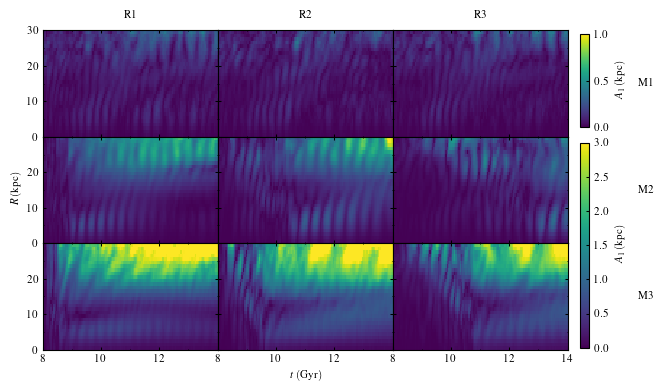

In [8]:
plt.rcParams['figure.figsize'] = (6.25,3.8)
plt.rcParams['xtick.minor.width'] = 0.6
plt.rcParams['ytick.minor.width'] = 0.6

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)

tmin = 8.0
tmax = 14.0

Rmin = 0
Rmax = 30

extent = [tmin, tmax, Rmin, Rmax]

im1 = ax1.imshow(Qlist1, extent=extent, origin='lower', vmin=0.0, vmax=1.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')
im2 = ax2.imshow(Qlist2, extent=extent, origin='lower', vmin=0.0, vmax=1.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')
im3 = ax3.imshow(Qlist3, extent=extent, origin='lower', vmin=0.0, vmax=1.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')

im4 = ax4.imshow(Qlist4, extent=extent, origin='lower', vmin=0.0, vmax=3.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')
im5 = ax5.imshow(Qlist5, extent=extent, origin='lower', vmin=0.0, vmax=3.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')
im6 = ax6.imshow(Qlist6, extent=extent, origin='lower', vmin=0.0, vmax=3.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')
im7 = ax7.imshow(Qlist7, extent=extent, origin='lower', vmin=0.0, vmax=3.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')
im8 = ax8.imshow(Qlist8, extent=extent, origin='lower', vmin=0.0, vmax=3.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')
im9 = ax9.imshow(Qlist9, extent=extent, origin='lower', vmin=0.0, vmax=3.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')

for ax in fig.get_axes():
    ax.set_xlim(8,14)
    ax.set_xticks(np.arange(8,14,2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylim(0,30)
    ax.set_yticks(np.arange(0,30,10))
    ax.yaxis.set_minor_locator(MultipleLocator(5))
    ax.label_outer()
ax9.set_xticks(np.arange(8,15,2))
ax1.set_yticks(np.arange(0,31,10))
ax8.set_xlabel(r'$t \, \mathrm{(Gyr)}$')  
ax4.set_ylabel(r'$R \, \mathrm{(kpc)}$')

fig.subplots_adjust(right=0.5)

cax1 = fig.add_axes([0.92, 0.735, 0.015, 0.245])
cb1  = plt.colorbar(im2, cax=cax1, ticks=[0, 0.5, 1])
cb1.set_label(r'$A_1 \, \mathrm{(kpc)}$')

cax2 = fig.add_axes([0.92, 0.155, 0.015, 0.54])
cb2  = plt.colorbar(im5, cax=cax2)
cb2.set_label(r'$A_1 \, \mathrm{(kpc)}$')

ax1.annotate('R1', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax2.annotate('R2', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate('R3', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate('M1', xy=(1.4, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax6.annotate('M2', xy=(1.4, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax9.annotate('M3', xy=(1.4, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')

fig.subplots_adjust(left=0.06, bottom=0.15, top=0.99, right=0.9, hspace=0.00, wspace=0.0)

plt.savefig('fig14-A1-b.pdf', bbox_inches='tight')

#### Fig 15 - $A_1$ for pertubed model NB.

In [38]:
n_snapshots_ = 121

Qlist1 = []
for j in range (0, n_snapshots_):
    doc = path_01_10_ + 'a1/'+ f'a1-{j}-nb.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist1.append(A1)

Qlist2 = []
for j in range (0, n_snapshots_):
    doc = path_01_20_ + 'a1/'+ f'a1-{j}-nb.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist2.append(A1)

Qlist3 = []
for j in range (0, n_snapshots_):
    doc = path_01_30_ + 'a1/'+ f'a1-{j}-nb.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist3.append(A1)

Qlist4 = []
for j in range (0, n_snapshots_):
    doc = path_05_10_ + 'a1/'+ f'a1-{j}-nb.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist4.append(A1)

Qlist5 = []
for j in range (0, n_snapshots_):
    doc = path_05_20_ + 'a1/'+ f'a1-{j}-nb.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist5.append(A1)

Qlist6 = []
for j in range (0, n_snapshots_):
    doc = path_05_30_ + 'a1/'+ f'a1-{j}-nb.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist6.append(A1)

Qlist7 = []
for j in range (0, n_snapshots_):
    doc = path_1_10_ + 'a1/'+ f'a1-{j}-nb.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist7.append(A1)

Qlist8 = []
for j in range (0, n_snapshots_):
    doc = path_1_20_ + 'a1/'+ f'a1-{j}-nb.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist8.append(A1)

Qlist9 = []
for j in range (0, n_snapshots_):
    doc = path_1_30_ + 'a1/'+ f'a1-{j}-nb.txt'
    A1, R = np.loadtxt(doc, unpack=True)
    Qlist9.append(A1)

In [39]:
Qlist1 = np.transpose(Qlist1)
Qlist2 = np.transpose(Qlist2)
Qlist3 = np.transpose(Qlist3)
Qlist4 = np.transpose(Qlist4)
Qlist5 = np.transpose(Qlist5)
Qlist6 = np.transpose(Qlist6)
Qlist7 = np.transpose(Qlist7)
Qlist8 = np.transpose(Qlist8)
Qlist9 = np.transpose(Qlist9)

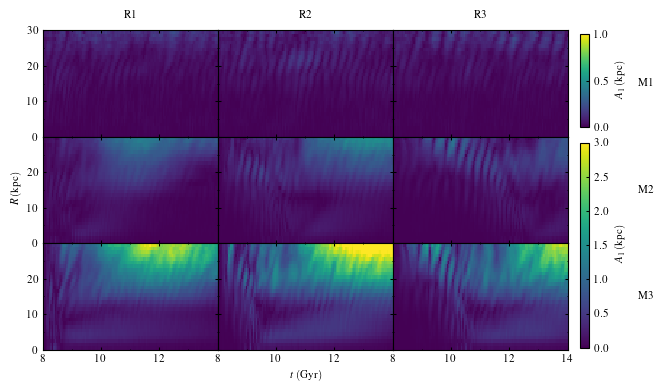

In [40]:
plt.rcParams['figure.figsize'] = (6.25,3.8)
plt.rcParams['xtick.minor.width'] = 0.6
plt.rcParams['ytick.minor.width'] = 0.6

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)

tmin = 8.0
tmax = 14.0

Rmin = 0
Rmax = 30

extent = [tmin, tmax, Rmin, Rmax]

im1 = ax1.imshow(Qlist1, extent=extent, origin='lower', vmin=0.0, vmax=1.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')
im2 = ax2.imshow(Qlist2, extent=extent, origin='lower', vmin=0.0, vmax=1.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')
im3 = ax3.imshow(Qlist3, extent=extent, origin='lower', vmin=0.0, vmax=1.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')

im4 = ax4.imshow(Qlist4, extent=extent, origin='lower', vmin=0.0, vmax=3.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')
im5 = ax5.imshow(Qlist5, extent=extent, origin='lower', vmin=0.0, vmax=3.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')
im6 = ax6.imshow(Qlist6, extent=extent, origin='lower', vmin=0.0, vmax=3.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')
im7 = ax7.imshow(Qlist7, extent=extent, origin='lower', vmin=0.0, vmax=3.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')
im8 = ax8.imshow(Qlist8, extent=extent, origin='lower', vmin=0.0, vmax=3.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')
im9 = ax9.imshow(Qlist9, extent=extent, origin='lower', vmin=0.0, vmax=3.0, cmap='viridis', 
                interpolation='nearest', aspect='auto')

for ax in fig.get_axes():
    ax.set_xlim(8,14)
    ax.set_xticks(np.arange(8,14,2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylim(0,30)
    ax.set_yticks(np.arange(0,30,10))
    ax.yaxis.set_minor_locator(MultipleLocator(5))
    ax.label_outer()
ax9.set_xticks(np.arange(8,15,2))
ax1.set_yticks(np.arange(0,31,10))
ax8.set_xlabel(r'$t \, \mathrm{(Gyr)}$')  
ax4.set_ylabel(r'$R \, \mathrm{(kpc)}$')

fig.subplots_adjust(right=0.5)

cax1 = fig.add_axes([0.92, 0.735, 0.015, 0.245])
cb1  = plt.colorbar(im2, cax=cax1, ticks=[0, 0.5, 1])
cb1.set_label(r'$A_1 \, \mathrm{(kpc)}$')

cax2 = fig.add_axes([0.92, 0.155, 0.015, 0.54])
cb2  = plt.colorbar(im5, cax=cax2)
cb2.set_label(r'$A_1 \, \mathrm{(kpc)}$')

ax1.annotate('R1', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax2.annotate('R2', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate('R3', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate('M1', xy=(1.4, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax6.annotate('M2', xy=(1.4, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax9.annotate('M3', xy=(1.4, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')

fig.subplots_adjust(left=0.06, bottom=0.15, top=0.99, right=0.9, hspace=0.00, wspace=0.0)

plt.savefig('figuras_2/fig-A1-nb.pdf', bbox_inches='tight')

Apêndices

#### Fig A1 - Maps of mean heights comparing the models perturbed by a satellite M2R2 at t=14 Gyr. 

In [41]:
path_maps_teste = [path_05_20 + 'snapshot_120.hdf5', path_05_20_ + 'snapshot_120.hdf5',
                   path_05_20_teste + 'snapshot_120.hdf5']

In [42]:
Qlist = []
    
snapshot = path_05_20 + 'snapshot_120.hdf5'

#ler snapshot
f = h5py.File(snapshot, 'r')

#ler info disk
f_disk = f['PartType2']

x_disk = np.array(f_disk['Coordinates'][:,0])
y_disk = np.array(f_disk['Coordinates'][:,1])
z_disk = np.array(f_disk['Coordinates'][:,2])
vx_disk = np.array(f_disk['Velocities'][:,0])
vy_disk = np.array(f_disk['Velocities'][:,1])
vz_disk = np.array(f_disk['Velocities'][:,2])
m_disk = np.array(f_disk['Masses'])
Ndisk = len(np.array(f_disk['ParticleIDs']))
        
#corrigir posição - centro de massa - disk
x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)

#corrigir posição - momento angular - disk
theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                           vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
    
x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                      vy=vy_new_disk, theta=theta)
   
x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)

#corrigir theta bar
thetas = theta_bar(m=m_disk, x=x, y=y, Rmax=10.0)
x_new_disk2, y_new_disk2 = corr_theta_b(N=Ndisk, x=x, y=y, theta=thetas)
    
#mapas de posição
Nbins = 80

Rmax =  36.0 #kpc
xmin = ymin = -Rmax
xmax = ymax = Rmax

results, xb, yb, binnum = stats.binned_statistic_2d(x, y, z, 
                            statistic='mean', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])

extent = [xb[0], xb[-1], yb[0], yb[-1]]

Q = results
Qlist.append(Q)

In [43]:
#ler snapshot
snapshot = path_05_20_ + 'snapshot_120.hdf5'

f = h5py.File(snapshot, 'r')

f_star = f['PartType4']

x_star = np.array(f_star['Coordinates'][:,0])
y_star = np.array(f_star['Coordinates'][:,1])
z_star = np.array(f_star['Coordinates'][:,2])
vx_star = np.array(f_star['Velocities'][:,0])
vy_star = np.array(f_star['Velocities'][:,1])
vz_star = np.array(f_star['Velocities'][:,2])
m_star = np.array(f_star['Masses'])
Nstar = len(np.array(f_star['ParticleIDs']))
    
f_gas = f['PartType0']
        
x_gas = np.array(f_gas['Coordinates'][:,0])
y_gas = np.array(f_gas['Coordinates'][:,1])
z_gas = np.array(f_gas['Coordinates'][:,2])
vx_gas = np.array(f_gas['Velocities'][:,0])
vy_gas = np.array(f_gas['Velocities'][:,1])
vz_gas = np.array(f_gas['Velocities'][:,2])
Ngas = len(np.array(f_gas['ParticleIDs']))
m_gas = np.array(f_gas['Masses'])
    
#corrigir posição - centro de massa - stars
x_new_star, y_new_star, z_new_star = shift_com(m_star, x_star, y_star, z_star)
vx_new_star, vy_new_star, vz_new_star = shift_com(m_star, vx_star, vy_star, vz_star)
            
#corrigir posição - momento angular - stars
theta_s, phi_s = theta_phi(N=Nstar, x=x_new_star, y=y_new_star, z=z_new_star, 
                                       vx=vx_new_star, vy=vy_new_star, vz=vz_new_star, m=m_star)
            
x_s, y_s, vx_s, vy_s = angular_momentum_1(N=Nstar, x=x_new_star, y=y_new_star,
                                                    vx=vx_new_star, vy=vy_new_star, theta=theta_s)
            
x_s, z_s, vx_s, vz_s = angular_momentum_2(N=Nstar, x=x_s, z=z_new_star, vx=vx_s, 
                                                      vz=vz_new_star, phi=phi_s)
    
#corrigir posição - centro de massa - gas
x_new_gas, y_new_gas, z_new_gas = shift_com(m_gas, x_gas, y_gas, z_gas)
vx_new_gas, vy_new_gas, vz_new_gas = shift_com(m_gas, vx_gas, vy_gas, vz_gas)
            
#corrigir posição - momento angular - gas
theta, phi = theta_phi(N=Ngas, x=x_new_gas, y=y_new_gas, z=z_new_gas, 
                                       vx=vx_new_gas, vy=vy_new_gas, vz=vz_new_gas, m=m_gas)
            
x, y, vx, vy = angular_momentum_1(N=Ngas, x=x_new_gas, y=y_new_gas,
                                                    vx=vx_new_gas, vy=vy_new_gas, theta=theta)
            
x, z, vx, vz = angular_momentum_2(N=Ngas, x=x, z=z_new_gas, vx=vx, 
                                                      vz=vz_new_gas, phi=phi)

#juntar componentes
x_tot = np.concatenate((x, x_s))
y_tot = np.concatenate((y, y_s))
z_tot = np.concatenate((z, z_s))
vx_tot = np.concatenate((vx, vx_s))
vy_tot = np.concatenate((vy, vy_s))
vz_tot = np.concatenate((vz, vz_s))
m_tot = np.concatenate((m_gas, m_star))
    
#mapas de posição
Nbins = 80

Rmax =  36.0 #kpc
xmin = ymin = -Rmax
xmax = ymax = Rmax

results, xb, yb, binnum = stats.binned_statistic_2d(x_tot, y_tot, z_tot, 
                                    statistic='mean', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])

extent = [xb[0], xb[-1], yb[0], yb[-1]]

Q = results
Qlist.append(Q)

In [44]:
#ler snapshot
snapshot = path_05_20_teste + 'snapshot_120.hdf5'

f = h5py.File(snapshot, 'r')

#ler info disk
f_disk = f['PartType2']

x_disk = np.array(f_disk['Coordinates'][:,0])
y_disk = np.array(f_disk['Coordinates'][:,1])
z_disk = np.array(f_disk['Coordinates'][:,2])
vx_disk = np.array(f_disk['Velocities'][:,0])
vy_disk = np.array(f_disk['Velocities'][:,1])
vz_disk = np.array(f_disk['Velocities'][:,2])
m_disk = np.array(f_disk['Masses'])
Ndisk = len(np.array(f_disk['ParticleIDs']))

f_star = f['PartType4']

x_star = np.array(f_star['Coordinates'][:,0])
y_star = np.array(f_star['Coordinates'][:,1])
z_star = np.array(f_star['Coordinates'][:,2])
vx_star = np.array(f_star['Velocities'][:,0])
vy_star = np.array(f_star['Velocities'][:,1])
vz_star = np.array(f_star['Velocities'][:,2])
m_star = np.array(f_star['Masses'])
Nstar = len(np.array(f_star['ParticleIDs']))

    
#corrigir posição - centro de massa - stars
x_new_star, y_new_star, z_new_star = shift_com(m_star, x_star, y_star, z_star)
vx_new_star, vy_new_star, vz_new_star = shift_com(m_star, vx_star, vy_star, vz_star)
            
#corrigir posição - momento angular - stars
theta_s, phi_s = theta_phi(N=Nstar, x=x_new_star, y=y_new_star, z=z_new_star, 
                                       vx=vx_new_star, vy=vy_new_star, vz=vz_new_star, m=m_star)
            
x_s, y_s, vx_s, vy_s = angular_momentum_1(N=Nstar, x=x_new_star, y=y_new_star,
                                                    vx=vx_new_star, vy=vy_new_star, theta=theta_s)
            
x_s, z_s, vx_s, vz_s = angular_momentum_2(N=Nstar, x=x_s, z=z_new_star, vx=vx_s, 
                                                      vz=vz_new_star, phi=phi_s)
    
#corrigir posição - centro de massa - disk
x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)

#corrigir posição - momento angular - disk
theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                           vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
    
x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                      vy=vy_new_disk, theta=theta)
   
x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)

#juntar componentes
x_tot = np.concatenate((x, x_s))
y_tot = np.concatenate((y, y_s))
z_tot = np.concatenate((z, z_s))
vx_tot = np.concatenate((vx, vx_s))
vy_tot = np.concatenate((vy, vy_s))
vz_tot = np.concatenate((vz, vz_s))
m_tot = np.concatenate((m_gas, m_star))
    
#mapas de posição
Nbins = 80

Rmax =  36.0 #kpc
xmin = ymin = -Rmax
xmax = ymax = Rmax

results, xb, yb, binnum = stats.binned_statistic_2d(x_tot, y_tot, z_tot, 
                                    statistic='mean', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])

extent = [xb[0], xb[-1], yb[0], yb[-1]]

Q = results
Qlist.append(Q)

/tmp/ipykernel_4883/2195223404.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


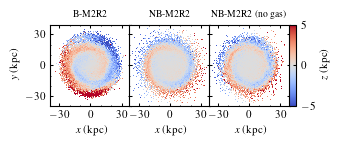

In [45]:
plt.rcParams['figure.figsize'  ] = (3.3,1.5)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

ax1.set_title("B-M2R2", fontsize=7)
ax2.set_title("NB-M2R2", fontsize=7)
ax3.set_title("NB-M2R2 (no gas)", fontsize=7)

cmap = 'coolwarm'

im1 = ax1.imshow(Qlist[0].T, extent=extent, origin='lower', cmap=cmap, interpolation='nearest',
                 vmin=-5.0, vmax=5.0)
im2 = ax2.imshow(Qlist[1].T, extent=extent, origin='lower', cmap=cmap, interpolation='nearest', 
                 vmin=-5.0, vmax=5.0)
im3 = ax3.imshow(Qlist[2].T, extent=extent, origin='lower', cmap=cmap, interpolation='nearest', 
                 vmin=-5.0, vmax=5.0)

for ax in fig.get_axes():
    ax.set_xlabel(r'$x$ (kpc)')  
    ax.set_ylabel(r'$y$ (kpc)')
    ax.set_xlim(-39,39)
    ax.set_xticks(np.arange(-30,31,30))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_ylim(-39,39)
    ax.set_yticks(np.arange(-30,31,30))
    ax.yaxis.set_minor_locator(MultipleLocator(10))
    ax.label_outer()
ax3.set_xticks(np.arange(-30,31,30))
ax1.set_yticks(np.arange(-30,31,30))

fig.subplots_adjust(right=0.9)

#cax1 = fig.add_axes([0.85, 0.27, 0.025, 0.54])
cax1 = fig.add_axes([0.86, 0.28, 0.022, 0.54])
cb1  = plt.colorbar(im1, cax=cax1)
cb1.set_label(r'$z$ (kpc)')

fig.subplots_adjust(left=0.5, bottom=0.5, top=1.8, right=3.0, hspace=0.0, wspace=0.0)
#fig.subplots_adjust(left=0.06, bottom=0.15, top=0.99, right=0.9, hspace=0.00, wspace=0.0)
plt.tight_layout()

plt.savefig('figuras_2/fig-maps-test.pdf')

#### Fig A2 - $W$ comparing the models perturbed by a satellite M2R2 at t=14 Gyr. 

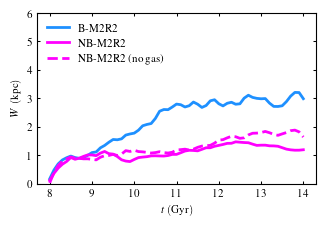

In [46]:
plt.rcParams['figure.figsize'  ] = (3.3,2.3) 

doc_nb = '30-amp-05-20-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-05-20.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
doc_nb2 = '30-amp-teste-new.txt'
amplitude_nb2, time_nb2 = loadtxt(doc_nb2, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
anb2_smooth = savgol_filter(amplitude_nb2, window_length=9, polyorder=3)
plt.plot(time_b, ab_smooth, color='dodgerblue', lw = 2, label='B-M2R2') 
plt.plot(time_nb, anb_smooth, color='magenta', lw = 2, label='NB-M2R2') 
plt.plot(time_nb2, anb2_smooth, color='magenta', lw = 2, ls = '--', label='NB-M2R2 (no gas)') 

plt.xlabel(r'$t \, \mathrm{(Gyr)}$')  
plt.ylabel(r'$W~({\rm kpc})$')
plt.legend(loc='upper left')
plt.ylim(0,6)
# plt.xticks()  
plt.tight_layout()
plt.savefig('figuras_2/fig-W-test.pdf')